In [2]:
using Plots
using Statistics
using LinearAlgebra
using JSON

include("readclassjson.jl");

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [5]:
# ; wget http://ee263.stanford.edu/twentytwenty/filter_data.json -P data/

In [7]:
# ; wget http://ee263.stanford.edu/twentytwenty/nonlinear_data.json -P data/

## Problem 1

In [13]:
D = [zeros(1,5) ; 1 zeros(1,4) ; 0 1 zeros(1,3) ; 0 0 1 0 0 ; zeros(1,3) 1 0 ]

5×5 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0

In [16]:
x = [1 ; 2 ; 3 ; 4 ; 5 ]

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

In [27]:
D * x

5-element Array{Float64,1}:
 0.0
 1.0
 2.0
 3.0
 4.0

In [23]:
D * D

5×5 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0

In [22]:
D * D * D

5×5 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0

In [259]:
filter_data = readclassjson("data/filter_data.json")

Dict{Any,Any} with 4 entries:
  "y" => [0.02, 0.035, -0.04, -0.055, -0.045, -0.155, -0.165, -0.265, -0.2, -0.…
  "m" => 11
  "x" => [0.4, -0.1, -1.4, 0.7, -0.4, -0.8, 0.4, -0.7, 1.1, 0.0  …  1.0, 0.2, 0…
  "n" => 60

In [260]:
y = filter_data["y"]
x = filter_data["x"]
m = filter_data["m"]
n = filter_data["n"]

60

In [37]:
D = [zeros(1, n) ; I(n)[1:(end-1),:]];

In [44]:
Dx = reduce(hcat, (D^i * x for i in 0:59))

60×60 Array{Float64,2}:
  0.4   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0  0.0
 -0.1   0.4   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
 -1.4  -0.1   0.4   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
  0.7  -1.4  -0.1   0.4   0.0   0.0      0.0   0.0   0.0   0.0   0.0  0.0
 -0.4   0.7  -1.4  -0.1   0.4   0.0      0.0   0.0   0.0   0.0   0.0  0.0
 -0.8  -0.4   0.7  -1.4  -0.1   0.4  …   0.0   0.0   0.0   0.0   0.0  0.0
  0.4  -0.8  -0.4   0.7  -1.4  -0.1      0.0   0.0   0.0   0.0   0.0  0.0
 -0.7   0.4  -0.8  -0.4   0.7  -1.4      0.0   0.0   0.0   0.0   0.0  0.0
  1.1  -0.7   0.4  -0.8  -0.4   0.7      0.0   0.0   0.0   0.0   0.0  0.0
  0.0   1.1  -0.7   0.4  -0.8  -0.4      0.0   0.0   0.0   0.0   0.0  0.0
 -0.1   0.0   1.1  -0.7   0.4  -0.8  …   0.0   0.0   0.0   0.0   0.0  0.0
 -0.2  -0.1   0.0   1.1  -0.7   0.4      0.0   0.0   0.0   0.0   0.0  0.0
 -0.4  -0.2  -0.1   0.0   1.1  -0.7      0.0   0.0   0.0   0.0   0.0  0.0
  ⋮           

In [286]:
rank(Dx)

58

In [271]:
function deficient(Dx, y)
    F = qr(Dx)
    Q = F.Q
    R1 = F.R[1:58, 1:58]
    R2 = F.R[:,59:60]
    Rinv = zeros(60, 60)
    Rinv[1:58, 1:58] = inv(R1)
    h = Rinv * transpose(Q) * y
    return h
end

deficient (generic function with 1 method)

In [278]:
h = deficient(Dx, y)

60-element Array{Float64,1}:
  0.050000000000000495
  0.09999999999999985
  0.1000000000000002
  0.15
  0.1500000000000006
  0.1999999999999993
  0.15000000000000002
  0.1499999999999991
  0.10000000000000053
  0.09999999999999944
  0.050000000000000835
 -6.534043492948813e-16
  5.039018018510801e-16
  ⋮
  3.137204038217156e-14
 -4.515485207967629e-15
  2.4338170367954604e-14
 -4.9453496853146817e-14
  5.3033966107562946e-14
 -5.28951882294848e-14
  1.0871858968641845e-13
 -1.0508260928077107e-13
  6.022959908591474e-14
 -1.8432477766339161e-13
  0.0
  0.0

In [283]:
sum(abs.(h) .> 1e-12)

11

In [280]:
isapprox(Dx * h, y)

true

## Problem 2

### f.

Note I numbered the edges to add to the incidence matrix such that the edges connecting the following nodes were indexed as below:

* 1-2 = 1
* 1-3 = 2
* 2-4 = 3
* 3-4 = 4
* 1-4 = 5


In [214]:
A = [ 1 1 0 0 1 ; -1 0 1 0 0 ; 0 -1 0 1 0; 0 0 -1 -1 -1]

4×5 Array{Int64,2}:
  1   1   0   0   1
 -1   0   1   0   0
  0  -1   0   1   0
  0   0  -1  -1  -1

A has neither full row or column rank

In [205]:
rank(A)

3

In [249]:
b = transpose([1 0 0 -1])

4×1 Transpose{Int64,Array{Int64,2}}:
  1
  0
  0
 -1

In [245]:
function leastnorm(A, b)
    F = qr(transpose(A))
    Q = F.Q
    R1 = F.R[1:3, 1:3]
    R2 = F.R[:,4]
    RTinv = zeros(5,4)
    RTinv[1:3, 1:3] = transpose(inv(R1))
    w = Q * RTinv * b
    return w
end

leastnorm (generic function with 1 method)

In [246]:
wln = leastnorm(A, b)

5×1 Array{Float64,2}:
 0.25
 0.24999999999999994
 0.25000000000000006
 0.25
 0.5000000000000001

In [247]:
norm(w)

0.7071067811865476

In [248]:
isapprox(A * w, b)

true

### g.

I only changed the index for the edge that changed

In [250]:
A = [1 1 0 0 0 ; -1 0 1 0 1 ; 0 -1 0 1 -1 ; 0 0 -1 -1 0]

4×5 Array{Int64,2}:
  1   1   0   0   0
 -1   0   1   0   1
  0  -1   0   1  -1
  0   0  -1  -1   0

In [251]:
rank(A)

3

In [252]:
wln2 = leastnorm(A, b)

5×1 Array{Float64,2}:
  0.5
  0.5
  0.4999999999999998
  0.4999999999999997
 -7.292309661585507e-17

In [253]:
A * wln2

4×1 Array{Float64,2}:
  1.0
 -2.949677015408864e-16
 -2.0463265954043407e-16
 -0.9999999999999996

In [254]:
isapprox(A * wln2, b)

true

In [255]:
norm(wln2)

0.9999999999999998

## Problem 3

In [53]:
nonlin = readclassjson("data/nonlinear_data.json")

Dict{Any,Any} with 2 entries:
  "x" => [0.0, 0.0256281, 0.0512563, 0.0768844, 0.102513, 0.128141, 0.153769, 0…
  "y" => [-0.267319, -0.155229, -0.131375, -0.184448, -0.0515287, -0.150317, -0…

In [54]:
x = nonlin["x"]
y = nonlin["y"]

200-element Array{Float64,1}:
 -0.267318974843255
 -0.15522881964934643
 -0.1313749835860241
 -0.18444821737633815
 -0.051528667263256375
 -0.15031677713628416
 -0.01714152900873025
  0.05627842256032599
  0.001432001308560086
  0.2018220908643815
  0.21660622469060334
  0.15065860186456878
  0.08137103102752144
  ⋮
 -0.6862618146791382
 -0.8868900876091095
 -0.8688449314631866
 -0.9270421150834154
 -0.7286998719765979
 -0.6300607035076583
 -0.6897080554140692
 -0.8486489769749685
 -0.6676967879798368
 -0.8961131217914085
 -0.6215913896959666
 -0.5934428217314303

In [60]:
k = 1:50
points = 0.1 .* k

0.1:0.1:5.0

In [156]:
function loess(x0, out="fit")
    function epanechnikov(xi)
        if norm(xi - x0)^2 <= 1
            1 - norm(xi - x0)^2
        else
            0
        end
    end
    
    b = [1 ; x0]
    W = diagm(epanechnikov.(x))
    coefs = inv(transpose(x) * W * x) * transpose(x) * W * y
    f = b * coefs
    if out == "fit"
        return sum(f)
    else
        return coefs
    end
end

loess (generic function with 2 methods)

In [157]:
fit = sum.(loess.(points))

50-element Array{Float64,1}:
  0.9404759956720716
  1.0522784512546368
  1.1532868848964892
  1.2461787265475768
  1.328761343473372
  1.4043545375756163
  1.4708379475215603
  1.5284534088999244
  1.576257592656153
  1.6089182413968122
  1.6311969221129574
  1.6387122777476248
  1.6355012993972955
  ⋮
 -0.7967311425173997
 -0.8307655460044236
 -0.857072199851509
 -0.8763466797111533
 -0.8938182474676004
 -0.9089668853737871
 -0.9217865580536138
 -0.9328992025548946
 -0.9418057211940825
 -0.9506087675428958
 -0.9588993729464128
 -0.9676158717773584

In [158]:
fit[20]

1.1909573090961318

In [163]:
at2 = loess(2, "coefs")
at2Line = points.*at2 .+at2

0.4366843466685817:0.039698576969871065:2.3819146181922637

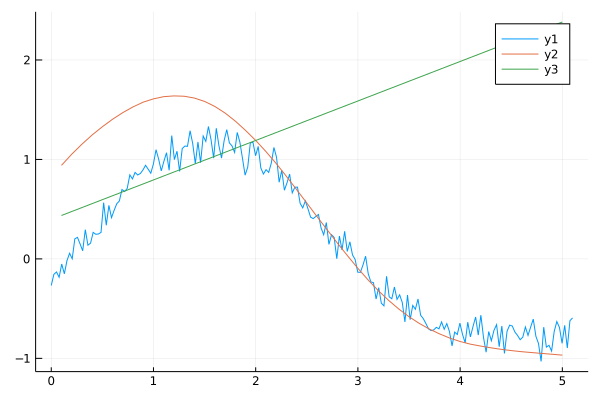

In [164]:
plot(x, y)
plot!(points, fit)
plot!(points, at2Line)